In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,3973.000000,...,3973.000000,3973.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,1638.724138,-0.333723,0.308691,0.837062,0.013144,-0.029177,0.052836,0.146895,-0.071352,0.055778,...,0.010465,-0.082885,-0.058484,0.029106,0.095278,-0.012623,0.044638,0.002639,65.000101,0.000504
std,1016.577498,1.351976,1.180436,0.981057,1.418751,1.207632,1.286610,1.090769,1.294647,0.919087,...,0.855829,0.635482,0.391158,0.603965,0.405989,0.503818,0.352752,0.254136,213.688183,0.022437
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-11.164794,-23.632502,-3.336805,...,-11.273890,-5.707801,-7.996811,-2.162523,-2.322906,-1.338556,-5.336289,-2.909294,0.000000,0.000000
25%,750.000000,-1.030747,-0.155734,0.287224,-0.908469,-0.573740,-0.735876,-0.278697,-0.205430,-0.473894,...,-0.211812,-0.512434,-0.210615,-0.338940,-0.141891,-0.339998,-0.041461,-0.020983,2.265000,0.000000
50%,1526.000000,-0.451819,0.409641,0.884503,0.099497,-0.089809,-0.209577,0.162196,0.028639,0.032286,...,-0.053234,-0.064435,-0.069939,0.100635,0.108219,-0.025647,0.033751,0.021264,12.990000,0.000000
75%,2526.000000,1.070572,0.921588,1.433851,0.982710,0.396675,0.449217,0.635055,0.298866,0.622704,...,0.102520,0.345346,0.062502,0.432692,0.361309,0.288406,0.205736,0.087058,54.990000,0.000000
max,3624.000000,1.685314,6.118940,4.017561,6.013346,10.658654,21.393069,34.303177,3.877662,6.450992,...,15.631453,4.393846,4.095021,1.215279,1.727063,3.463246,3.852046,4.157934,7712.430000,1.000000


In [ ]:
df_fraud = df[df['Class'] == 1]
number_fraud = len(df[df.Class == 1])
number_no_fraud = len(df[df.Class == 0])

In [ ]:
number_fraud

2

In [ ]:
number_no_fraud

3970

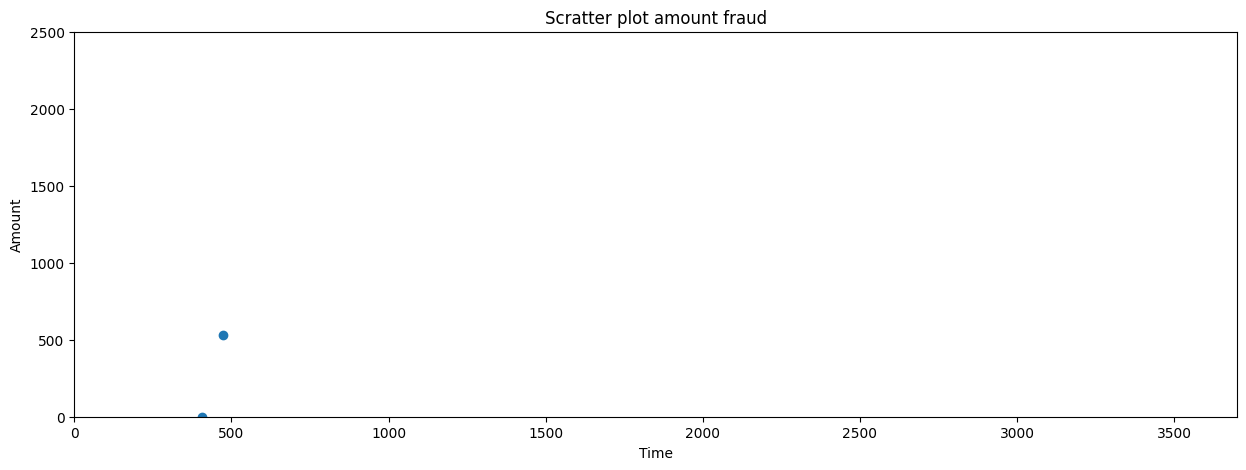

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(df_fraud['Time'], df_fraud['Amount'])
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,3700])
plt.ylim([0,2500])
plt.show()

In [ ]:

df['V1'].fillna(value=df['V1'].mode()[0],inplace=True)
df['V2'].fillna(value=df['V2'].mode()[0],inplace=True)
df['V3'].fillna(value=df['V3'].mode()[0],inplace=True)
df['V4'].fillna(value=df['V4'].mode()[0],inplace=True)
df['V5'].fillna(value=df['V5'].mode()[0],inplace=True)
df['V6'].fillna(value=df['V6'].mode()[0],inplace=True)
df['V7'].fillna(value=df['V7'].mode()[0],inplace=True)
df['V8'].fillna(value=df['V8'].mode()[0],inplace=True)
df['V9'].fillna(value=df['V9'].mode()[0],inplace=True)
df['V10'].fillna(value=df['V10'].mode()[0],inplace=True)
df['V11'].fillna(value=df['V11'].mode()[0],inplace=True)
df['V12'].fillna(value=df['V12'].mode()[0],inplace=True)
df['V13'].fillna(value=df['V13'].mode()[0],inplace=True)
df['V14'].fillna(value=df['V14'].mode()[0],inplace=True)
df['V15'].fillna(value=df['V15'].mode()[0],inplace=True)
df['V16'].fillna(value=df['V16'].mode()[0],inplace=True)
df['V17'].fillna(value=df['V17'].mode()[0],inplace=True)
df['V18'].fillna(value=df['V18'].mode()[0],inplace=True)
df['V19'].fillna(value=df['V19'].mode()[0],inplace=True)
df['V20'].fillna(value=df['V20'].mode()[0],inplace=True)
df['V21'].fillna(value=df['V21'].mode()[0],inplace=True)
df['V22'].fillna(value=df['V22'].mode()[0],inplace=True)
df['V23'].fillna(value=df['V23'].mode()[0],inplace=True)
df['V24'].fillna(value=df['V24'].mode()[0],inplace=True)
df['V25'].fillna(value=df['V25'].mode()[0],inplace=True)
df['V26'].fillna(value=df['V26'].mode()[0],inplace=True)
df['V27'].fillna(value=df['V27'].mode()[0],inplace=True)
df['V28'].fillna(value=df['V28'].mode()[0],inplace=True)
df['Amount'].fillna(value=df['Amount'].mode()[0],inplace=True)
df['Class'].fillna(value=df['Class'].mode()[0],inplace=True)

X=df.iloc[:,:-1]
y=df['Class']
# Assuming X contains features and y contains labels (fraud or not fraud)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predictions on the test set
y_pred = model.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[795]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       795

    accuracy                           1.00       795
   macro avg       1.00      1.00      1.00       795
weighted avg       1.00      1.00      1.00       795



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Instantiate logistic regression model
model = LogisticRegression()

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Evaluate the model with the best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'C': 0.001}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       795

    accuracy                           1.00       795
   macro avg       1.00      1.00      1.00       795
weighted avg       1.00      1.00      1.00       795

